# Attention, le rapport demandé est disponible au lien suivant : 

## https://docs.google.com/document/d/1n7P_G6DiySgiZJVkF5h1L-OOpH_um_Vpb9vxl7qe9iA/edit?usp=sharing

## Network Attacks Detection and Classification

+ Distributed Denial of Service (DDoS) attack is a menace to network security that aims at exhausting the target networks with `malicious traffic`. 

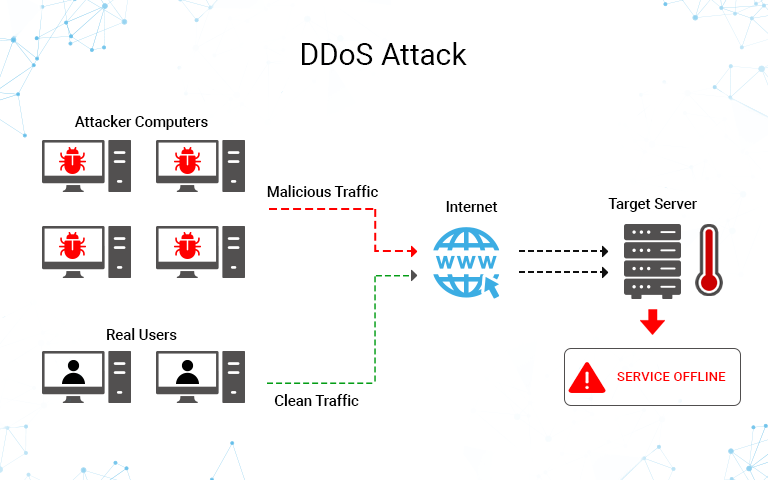

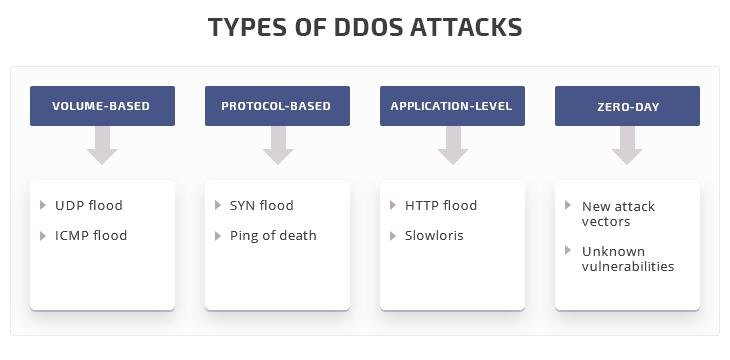

## Dataset : CIC-DDoS2019
+ From The Canadian Institut of Cybersecurity: https://www.unb.ca/cic/datasets/ddos-2019.html
+ CIC-DDoS2019 contains `benign` and common `DDoS attacks` collected bt pcap files
+ `CICFlowMeter-V3` is used to extract from pcap files network traffic features (saved as CSV files)
+ https://pypi.org/project/cicflowmeter/
+ `12 DDoS attacks` includes NTP, DNS, LDAP, MSSQL, NetBIOS, SNMP, SSDP, UDP, UDP-Lag, WebDDoS, SYN and TFTP on the `training day`.
+ `7 attacks` including PortScan, NetBIOS, LDAP, MSSQL, UDP, UDP-Lag and SYN in the `testing day`. 

In [1]:
import pandas as pd
NTP = pd.read_csv('DrDoS_NTP.csv', low_memory=False)
NTP.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


In [2]:
NTP.shape

(1217007, 88)

In [3]:
NTP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217007 entries, 0 to 1217006
Data columns (total 88 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1217007 non-null  int64  
 1   Flow ID                       1217007 non-null  object 
 2    Source IP                    1217007 non-null  object 
 3    Source Port                  1217007 non-null  int64  
 4    Destination IP               1217007 non-null  object 
 5    Destination Port             1217007 non-null  int64  
 6    Protocol                     1217007 non-null  int64  
 7    Timestamp                    1217007 non-null  object 
 8    Flow Duration                1217007 non-null  int64  
 9    Total Fwd Packets            1217007 non-null  int64  
 10   Total Backward Packets       1217007 non-null  int64  
 11  Total Length of Fwd Packets   1217007 non-null  float64
 12   Total Length of Bwd Packets

In [4]:
NTP.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,...,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06,1.217007e+06
mean,3.258309e+03,1.360350e+03,3.251510e+04,1.688341e+01,1.314029e+05,6.315746e+01,1.140297e-01,2.758204e+04,1.324724e+02,4.320774e+02,...,-8.383064e+06,1.051678e+03,3.300205e+02,1.482967e+03,8.418789e+02,4.151085e+04,2.718502e+03,4.397031e+04,3.920079e+04,9.886311e-01
std,2.008943e+03,5.762652e+03,1.911544e+04,1.141547e+00,3.442526e+06,6.368370e+01,5.989404e+00,2.811284e+04,2.097989e+04,6.799413e+01,...,9.406053e+07,6.693206e+04,2.301964e+04,8.194273e+04,6.370605e+04,1.419061e+06,2.421458e+05,1.490299e+06,1.380248e+06,1.060171e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.592000e+03,6.340000e+02,1.595600e+04,1.700000e+01,3.500000e+02,1.400000e+01,0.000000e+00,5.280000e+03,0.000000e+00,4.400000e+02,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.191000e+03,7.220000e+02,3.253400e+04,1.700000e+01,1.001000e+03,3.900000e+01,0.000000e+00,1.672000e+04,0.000000e+00,4.400000e+02,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.815000e+03,8.760000e+02,4.912000e+04,1.700000e+01,4.296000e+03,9.400000e+01,0.000000e+00,4.136000e+04,0.000000e+00,4.400000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.588300e+04,6.553200e+04,6.553500e+04,1.700000e+01,1.199999e+08,9.160000e+02,1.862000e+03,1.760000e+05,8.829488e+06,3.569000e+03,...,4.400000e+02,1.721664e+07,1.100562e+07,1.941638e+07,1.721664e+07,1.147455e+08,5.072577e+07,1.147455e+08,1.147455e+08,1.000000e+00


In [5]:
NTP_cols = list(NTP.columns.values)
print(NTP_cols)    

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

In [2]:
import numpy as np
NTP[' Label'] = NTP[' Label'].replace('BENIGN', np.uint8(0))
NTP[' Label'] = NTP[' Label'].replace('DrDoS_NTP', np.uint8(1))

In [4]:
NTP[' Label'].sum()/NTP.shape[0]

0.9881964524443985

In [5]:
# clean dataset
import numpy as np
# drop constant columns
NTP = NTP.loc[:, (NTP != NTP.iloc[0]).any()] 
# drop nan, inf 
NTP = NTP[~NTP.isin([np.nan, np.inf, -np.inf]).any(1)]
# Drop duplicates
NTP = NTP.drop_duplicates()

In [6]:
#checking for missing values
NTP.isna().sum().sum()

0

In [7]:
#drop unnecessary values
NTP.drop(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', 'SimillarHTTP'], axis=1, inplace=True)     

In [10]:
NTP.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
count,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,...,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06,1.209961e+06
mean,1.321681e+05,6.351360e+01,1.146938e-01,2.773848e+04,1.332438e+02,4.325030e+02,3.470843e+02,4.209110e+02,2.538914e+01,5.476850e+00,...,1.057802e+03,3.319423e+02,1.491603e+03,8.467815e+02,4.175259e+04,2.734332e+03,4.422636e+04,3.942907e+04,9.886567e-01,9.882054e-01
std,3.452521e+06,6.369712e+01,6.006812e+00,2.811951e+04,2.104088e+04,6.695390e+01,1.320355e+02,6.242803e+01,4.390152e+01,1.884354e+02,...,6.712662e+04,2.308655e+04,8.218090e+04,6.389124e+04,1.423183e+06,2.428498e+05,1.494628e+06,1.384258e+06,1.058994e-01,1.079606e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.530000e+02,1.400000e+01,0.000000e+00,5.440000e+03,0.000000e+00,4.400000e+02,2.240000e+02,4.289231e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,1.006000e+03,4.000000e+01,0.000000e+00,1.688000e+04,0.000000e+00,4.400000e+02,4.400000e+02,4.400000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,4.339000e+03,9.400000e+01,0.000000e+00,4.136000e+04,0.000000e+00,4.400000e+02,4.400000e+02,4.400000e+02,4.156922e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.199999e+08,9.160000e+02,1.862000e+03,1.760000e+05,8.829488e+06,3.569000e+03,2.020000e+03,2.666087e+03,1.365423e+03,3.796000e+04,...,1.721664e+07,1.100562e+07,1.941638e+07,1.721664e+07,1.147455e+08,5.072577e+07,1.147455e+08,1.147455e+08,1.000000e+00,1.000000e+00


In [11]:
NTP_cols = list(NTP.columns.values)
print(NTP_cols)

[' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment 

<AxesSubplot:>

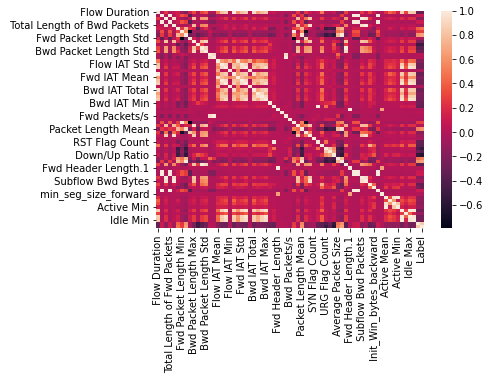

In [12]:
# check the correlation 
import seaborn as sns
corr_matrix = NTP.corr()
sns.heatmap(corr_matrix)

In [13]:
corr_matrix[' Label'].sort_values(ascending=False)

 Label                     1.000000
 Inbound                   0.834943
 Avg Fwd Segment Size      0.663027
 Fwd Packet Length Mean    0.663027
 Packet Length Mean        0.601625
                             ...   
 Avg Bwd Segment Size     -0.356888
 CWE Flag Count           -0.364159
 Bwd Packet Length Min    -0.506848
 URG Flag Count           -0.532949
 Down/Up Ratio            -0.623123
Name:  Label, Length: 67, dtype: float64

percent_class:
 1    98.82054
0     1.17946
Name:  Label, dtype: float64


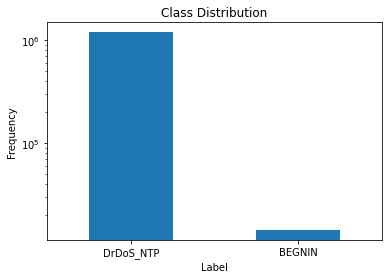

In [11]:
import matplotlib.pyplot as plt

# Verifying the partition of classes 1 and 0 
LABELS = ["DrDoS_NTP", "BEGNIN"]

# Number of transactions in each class
number_of_classes = pd.value_counts(NTP[' Label'], sort = False)

# Percentage of each class
percent_class = 100*number_of_classes/NTP.shape[0]
print("percent_class:\n", percent_class)

# Showing the distribution of each class using a log-scale 
number_of_classes.plot(kind = 'bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(len(number_of_classes)), LABELS)
plt.xlabel("Label")
plt.ylabel("Frequency");
plt.yscale('log')

In [15]:
NTP.skew()

 Flow Duration                   31.525585
 Total Fwd Packets                1.100457
 Total Backward Packets         186.865028
Total Length of Fwd Packets       1.095812
 Total Length of Bwd Packets    251.712881
                                   ...    
 Idle Std                       113.842472
 Idle Max                        38.496208
 Idle Min                        41.053254
 Inbound                         -9.228713
 Label                           -9.044155
Length: 67, dtype: float64

In [16]:
NTP.kurtosis()

 Flow Duration                   1025.149924
 Total Fwd Packets                 -0.041758
 Total Backward Packets         41823.490866
Total Length of Fwd Packets        -0.090287
 Total Length of Bwd Packets    73454.293207
                                    ...     
 Idle Std                       14131.509162
 Idle Max                        1545.219155
 Idle Min                        1770.855293
 Inbound                           83.169272
 Label                             79.796868
Length: 67, dtype: float64

In [9]:
#choose a smaller sample with random indice
random_indices = np.random.choice(NTP.shape[0], 100000, replace=False)
NTP = NTP.iloc[random_indices,:]

outliers_fraction = 1.0 - NTP[' Label'].sum()/NTP.shape[0]
print(outliers_fraction)

0.012149999999999994


In [ ]:
#Here i just export the reduced dataset to not have to redo everything each time the kernel die during training. 
NTP.to_csv('NTP.csv')

In [5]:
import pandas as pd
import numpy as np 
NTP=pd.read_csv('NTP.csv')

In [6]:
from sklearn.model_selection import train_test_split

X = NTP.drop(' Label', axis=1) # input variables (X is dataframe)
y = NTP[' Label'].to_numpy() # output variable (y is an array)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (80000, 66) X_test: (20000, 66)


In [11]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson', standardize=True, copy=False).fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.36063264, -0.25473791, -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724],
       [-0.06928564, -0.509038  , -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724],
       [ 1.01881678, -0.86531583, -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724],
       ...,
       [ 1.23734888,  1.5513648 , -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724],
       [ 1.92728492,  1.5513648 , -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724],
       [-0.72312122, -0.66911437, -0.11454214, ..., -0.03590487,
        -0.03590487,  0.10915724]])

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html
# https://scikit-learn.org/stable/modules/outlier_detection.html

In [15]:
#Principale componet analysis PCA
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 0.98)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [18]:
#one class SVM 
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
SVM_hyper=[0.1, 0.2, 0.3, 0.4, 0.5]
for k in SVM_hyper:
    svm = OneClassSVM(gamma = k, nu = outliers_fraction).fit(X_train)
    y_pred = svm.predict(X_test)
    y_pred = np.where(y_pred == -1, 0, y_pred)
    print('f1 score for OCSVM with gamma = {} : {}'.format(k, f1_score(y_test, y_pred)))

f1 score for OCSVM with gamma = 0.1 : 0.9767836919592299
f1 score for OCSVM with gamma = 0.2 : 0.9882418812989922
f1 score for OCSVM with gamma = 0.3 : 0.9879573287165517
f1 score for OCSVM with gamma = 0.4 : 0.9761788261955654
f1 score for OCSVM with gamma = 0.5 : 0.9742504773208113


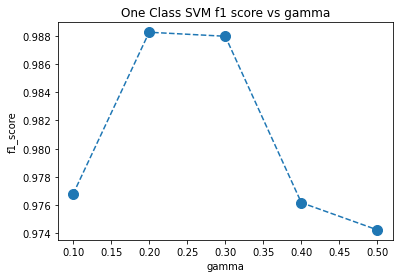

In [30]:
parameter = [0.9767836919592299, 0.9882418812989922,0.9879573287165517,0.9761788261955654,0.9742504773208113]
plt.plot(SVM_hyper, parameter,"--", marker = ".", markersize= 20)
plt.title("One Class SVM f1 score vs gamma")
plt.xlabel("gamma")
plt.ylabel("f1_score")
plt.show()

In [19]:
Best_model = []
Best_model.append(('f1 score for OCSVM with gamma = 0.2', 0.988241881298992))


In [8]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

In [7]:
#preprocess data for unsupervised learning
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [5]:
#PCA for unsupervised learning
Xpca = PCA(n_components = 0.98)
Xpca.fit(X_normalized)
X_normalized= Xpca.transform(X_normalized)

In [6]:
#will be used to transform the ypred to the y format
f = lambda x: 1 if x >= 0 else 0
from sklearn.metrics import f1_score

In [ ]:
# DBScan fine tuning (j'ai séparé les models car plus de calcul me fait crash le kernel)
k=0.1
db_default = DBSCAN(eps = k).fit_predict(X_normalized)
db_y = np.array([f(x) for x in db_default])
print('f1 score for DBSCAN with eps ={} : {}'.format(k,f1_score(y, db_y)))
k=0.2
db_default = DBSCAN(eps = k).fit_predict(X_normalized)
db_y = np.array([f(x) for x in db_default])
print('f1 score for DBSCAN with eps ={} : {}'.format(k,f1_score(y, db_y)))

f1 score for DBSCAN with eps =0.1 : 0.9877561763232087
f1 score for DBSCAN with eps =0.2 : 0.9935637112073955


In [ ]:
k=0.3
db_default = DBSCAN(eps = k).fit_predict(X_normalized)
db_y = np.array([f(x) for x in db_default])
print('f1 score for DBSCAN with eps ={} : {}'.format(k,f1_score(y, db_y)))

f1 score for DBSCAN with eps =0.3 : 0.9938321913328706


In [21]:
Best_model.append(('f1 score for DBSCAN with eps =0.3', 0.9938321913328706))

In [25]:
Forest_hyper = [50,75,100,125,150]
for k in Forest_hyper:
    Forest = IsolationForest(n_estimators=k)
    forest_pred = Forest.fit_predict(X_normalized)
    forest_y = np.array([f(x) for x in forest_pred])
    print('f1 score for IsolationForest with n_estimators ={} : {}'.format(k,f1_score(y, forest_y)))

f1 score for IsolationForest with n_estimators =50 : 0.8929334511650799
f1 score for IsolationForest with n_estimators =75 : 0.9036386198949631
f1 score for IsolationForest with n_estimators =100 : 0.924643584521385
f1 score for IsolationForest with n_estimators =125 : 0.9123962037072657
f1 score for IsolationForest with n_estimators =150 : 0.910066892394087


In [26]:
Best_model.append(('f1 score for IsolationForest with n_estimators =100', 0.924643584521385))

In [29]:
Factor_hyper = [3,4,5,6,7,8]
for k in Factor_hyper:
    factor = LocalOutlierFactor(n_neighbors= k)
    factor_pred = factor.fit_predict(X_normalized)
    factor_y = np.array([f(x) for x in factor_pred])
    print('f1 score for LocalOutlierFactor with n_estimators ={} : {}'.format(k,f1_score(y, forest_y)))

f1 score for LocalOutlierFactor with n_estimators =3 : 0.910066892394087
f1 score for LocalOutlierFactor with n_estimators =4 : 0.910066892394087
f1 score for LocalOutlierFactor with n_estimators =5 : 0.910066892394087
f1 score for LocalOutlierFactor with n_estimators =6 : 0.910066892394087
f1 score for LocalOutlierFactor with n_estimators =7 : 0.910066892394087
f1 score for LocalOutlierFactor with n_estimators =8 : 0.910066892394087


In [31]:
Best_model.append(('f1 score for LocalOutlierFactor' , 0.910066892394087))

In [38]:
Best_model.sort(key = lambda x:x[1],reverse = True)

In [39]:
Best_model

[('f1 score for DBSCAN with eps =0.3', 0.9938321913328706),
 ('f1 score for OCSVM with gamma = 0.2', 0.988241881298992),
 ('f1 score for IsolationForest with n_estimators =100', 0.924643584521385),
 ('f1 score for LocalOutlierFactor', 0.910066892394087)]

In [41]:
print('The best model is dbscan with eps = 0.3')

The best model is dbscan with eps = 0.3


# Let's export the full pipeline for this model 

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 0.98)),('dbscan',DBSCAN(eps = 0.3))])

In [11]:
import joblib
joblib.dump(pipe, 'full_pipeline.pkl')


['full_pipeline.pkl']